Streaming output truncated to the last 5000 lines.
i 1
i 2
i 3
i 4
i 5
i 6
i 7
i 8
i 9
i 10
i 11
i 12
i 13
i 14
i 15
i 16
i 17
i 18
i 19
i 20
i 21
i 22
i 23
i 24
i 25
i 26
i 27
i 28
i 29
i 30
i 31
i 32
i 33
i 34
i 35
i 36
i 37
i 38
i 39
i 40
i 41
i 42
i 43
i 44
i 45
i 46
i 47
i 48
i 49
i 50
i 51
i 52
i 53
i 54
i 55
i 56
i 57
i 58
i 59
i 60
i 61
i 62
i 63
i 64
i 65
i 66
i 67
i 68
i 69
i 70
i 71
i 72
i 73
i 74
i 75
i 76
i 77
i 78
i 79
i 80
i 81
i 82
i 83
i 84
i 85
i 86
i 87
i 88
i 89
i 90
i 91
i 92
i 93
i 94
i 95
i 96
i 97
i 98
i 99
i 100
i 101
i 102
i 103
i 104
i 105
i 106
i 107
i 108
i 109
i 110
i 111
i 112
i 113
i 114
i 115
i 116
i 117
i 118
i 119
i 120
i 121
i 122
i 123
i 124
i 125
i 126
i 127
i 128
i 129
i 130
i 131
i 132
i 133
i 134
i 135
i 136
i 137
i 138
i 139
i 140
i 141
i 142
i 143
i 144
i 145
i 146
i 147
i 148
i 149
i 150
i 151
i 152
i 153
i 154
i 155
i 156
i 157
i 158
i 159
i 160
i 161
i 162
i 163
i 164
i 165
i 166
i 167
i 168
i 169
i 170
i 171
i 172
i 173
i 174
i 175
i 176
i

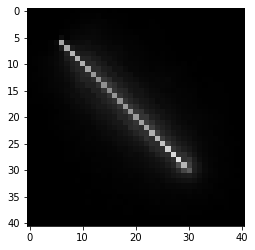

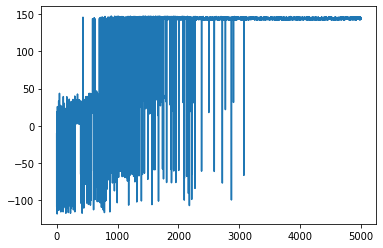

In [9]:
import numpy as np
import math 
import random
from matplotlib import cm
import matplotlib.pyplot as plt
def magnitude(X):
    suma=0
    for j in range(len(X)):
        suma+=pow(X[j],2)
    return math.sqrt(suma)
def def_variables():
    umax_x=0.52 # x-скорост на глайдера
    umax_y=0.52 # у-скорост на глайдера
    k=1.
    T_max=125 # Брой стъпки преди да терминираме ако не е намерил край
    V_ves=np.array([umax_x*k,umax_y*k]) # Скороста на глайдера
    V_mag=magnitude(V_ves)
    X_begin=np.array([30, 30])
    X_fin=np.array([5,5])
    q_values=np.array([[[0.0 for i in range(8)] for j in range(41)]for k in range(41)])
    w_values=np.array([[0.0 for ooj in range(41)]for k in range(41)])
    Na = 8 # Брой акции
    return T_max, V_ves, X_fin, X_begin, Na, V_mag,q_values, w_values
T_max, V_ves, X_fin, X_begin, Na, V_mag, q_values, w_values=def_variables()

# h e спомагателна ф-ия
def h(m,n,a,q,t):
    return math.exp(q[m][n][a]*t)
def policy(m,n,a,q,t):
    policito=h(m,n,a,q,t)
    sum=0.0
    for i in range(8):
        sum+=h(m,n,i,q,t)
    if sum==0.0:
        print("not good")
    else:
        policito=policito/sum
    return policito #returns the value of the policy for the specific positon and action for the current q function

# Връща ти наградата за конкретния момент от време
def nagrada(X_tminus1,X_t,X_fin=X_fin,V_mag=V_mag):
    return -0.001+(magnitude(X_fin-X_tminus1)-magnitude(X_fin-X_t))/V_mag
# Връща ти начални точки в някакъв квадрат
def initialise_X_st(X_begin):
    X_st=np.array(X_begin[0],X_begin[1])+np.array([int(np.random.choice([-1,0,1])),int(np.random.choice([-1,0,1]))])
     # initialise a starting postion in a grid 
    return X_st
# Връща ти новата стойност на q функцията след като си взел акция
def update_q(q,reward,beta_t,m,n,Na,a):
    suma=0.
    ziee=np.array(q[m][n])
    alpha_t=0.01 # this param is missing
    for u in range(Na):
        if u!=a:
            q[m][n][u]=q[m][n][u]-alpha_t*beta_t*(q[m][n][u])
        else:
            q[m][n][u]=q[m][n][u]+alpha_t*beta_t*(1.-q[m][n][u])
   # print(np.array(q[m][n])-ziee)
    return q #updates q according to the reward ( missing alpha_t param from adam)
def update_v(v,reward,beta_t,m,n):
    alpha_pt = 0.01 #this param is missing
    v[m][n]=v[m][n]+alpha_pt*beta_t
    return v #updates v accordnig to the reward ( missing alpha_pt param from adam)
# Избира акция спрямо сегашната q фунцкия
def choose_action(m,n,Na,q,t):
    action_space=[]
    for u in range(Na):
        action_space.append(policy(m,n,u,q,t))
    a=random.choices(np.array([0,1,2,3,4,5,6,7]), action_space, k=1)
    return int(a[0]) #chooses action accordnig to the policy
def exp_rt_dt(rt_dt,m_1,n_1,w_values):#return expected reward, има нужда от наградата която е полчил агента взимайки акцията и новата локация
    return rt_dt+w_values[m_1][n_1]
def beta_t(exp_rt,w_values,m,n):#return beta param. Има нужда от value function и старата локация и експ реуард
    return exp_rt-w_values[m][n]

#speed_x and speed_y are the u and v arrays in the environment code
def take_action(V_ves,speed_x,speed_y,m,n,a,V_mag=V_mag,X_fin=X_fin):
    pos_actions=np.array([[1,0],[1,1],[0,1],[-1,1],[-1,0],[-1,-1],[0,-1],[1,-1]])
    action=np.array(pos_actions[a])
    m_t=int(round(m+(int(round(float(speed_x[m][n])+float(action[0])*float(V_ves[0]))))))

    n_t=int(round(n+(int(round(float(speed_y[m][n])+float(action[1])*float(V_ves[1]))))))
    
    X_tminus1, X_t = np.array([m,n]), np.array([m_t,n_t])

    #checks if we are at the final state or near it if we are terminates and gives big reward
    rewardat=0.
    if (X_fin[0]==m_t and X_fin[1]==n_t) or(X_fin[0]==m_t and X_fin[1]==n_t-1) or(X_fin[0]==m_t and X_fin[1]==n_t+1) or(X_fin[0]==m_t-1 and X_fin[1]==n_t) or(X_fin[0]==m_t+1 and X_fin[1]==n_t) or(X_fin[0]==m_t+1 and X_fin[1]==n_t+1) or(X_fin[0]==m_t+1 and X_fin[1]==n_t-1) or(X_fin[0]==m_t-1 and X_fin[1]==n_t-1) or (X_fin[0]==m_t-1 and X_fin[1]==n_t+1) :
        Terminal=True
        rewardat=100.
    #checks if we are the boundry terminates the episode because we are lost gives big punishment 
    elif m_t>40 or m_t<0 or n_t>40 or n_t<0 : #Последния or го махни ако ще ползва друг env
        Terminal=True
        m_t, n_t=m, n
        rewardat=-100.
    #else gives me the reward and does not terminate
    else:
        Terminal=False
        rewardat=float(nagrada(X_tminus1,X_t))
    return m_t,n_t,Terminal,rewardat
# Main loop
#X_current=initialise_X_st(X_start)
j = 0
trajectories = np.zeros(shape=(41,41))
actions_taken = []
#nt = 500 #j
#np.zeros((41,41)), np.zeros((41,41)), np.zeros((41,41))
u = np.zeros((41, 41))
v = np.zeros((41, 41))
rew = []
sum_r = 0
number_of_episodes=5000
for i in range (number_of_episodes):
    X_current=initialise_X_st(X_begin)
    Terminal,j = False,0
    sum_r = 0
    print('i',i)
    while not ( Terminal or j>T_max):
        t=float((float(2*i)+float(number_of_episodes))/float(number_of_episodes))
        a=choose_action(X_current[0],X_current[1],Na,q_values,t)
        m_t,n_t,Terminal,rewarda=take_action(V_ves,u,v,int(X_current[0]),int(X_current[1]),a) #here we require speed_x and speed_y from the environment
        sum_r+= rewarda
        #print(rewarda)
        if i == number_of_episodes-1:
            actions_taken.append((m_t,n_t))
        trajectories[m_t][n_t] = trajectories[m_t][n_t] + 255/number_of_episodes
        X_forward=np.array([m_t,n_t])
        exp_rt=exp_rt_dt(rewarda,int(X_forward[0]),int(X_forward[1]),w_values)
        betat=beta_t(exp_rt,w_values,X_current[0],X_current[1])
        q_values=update_q(q_values,rewarda,betat,X_current[0],X_current[1],Na,a)
        w_values=update_v(w_values,rewarda,betat,X_current[0],X_current[1])
        X_current=X_forward.copy()
        j+=1
    rew.append(sum_r)
print('actions_taken',actions_taken)
mu=np.array([0 for j in range(len(rew))])
for j in range(number_of_episodes):
    z=0.
    if j<25:
        for m in range(j):
            z+=rew[m]
        z=z/float((j+1))
    else :
        for m in range(25):
            z+=rew[j-24+m]
        z=z/25.
    mu[j]=z   
plt.imshow(trajectories, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.plot(rew[:number_of_episodes-2])
plt.show()